# Linking Writing Processes to Writing Quality

In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np

#### load the training logs and scores

In [2]:
# load data
train_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
print(train_logs.shape)
train_logs.head()

(8405898, 11)


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [3]:
train_scores = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')
print(train_scores.shape)
train_scores.head()

(2471, 2)


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


#### Check the information on both

In [4]:
# info on train_logs
train_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [5]:
# info on train_scores
train_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2471 non-null   object 
 1   score   2471 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.7+ KB


###### checking the exact values in the categorical columns

In [6]:
# checking the various values in text_change
train_logs['text_change'].value_counts()

text_change
q                                                                                                                                                               6128208
                                                                                                                                                                1376829
NoChange                                                                                                                                                         703851
.                                                                                                                                                                 67797
,                                                                                                                                                                 54797
                                                                                                                                                    

In [7]:
# for activity
train_logs['activity'].value_counts()

activity
Input                                     6726796
Remove/Cut                                 970158
Nonproduction                              703851
Replace                                      4448
Paste                                         599
Move From [1306, 1371] To [1061, 1126]          2
Move From [13, 65] To [9, 61]                   1
Move From [274, 314] To [299, 339]              1
Move From [624, 625] To [845, 846]              1
Move From [1861, 2063] To [1766, 1968]          1
Move From [1766, 1968] To [1861, 2063]          1
Move From [2091, 2179] To [252, 340]            1
Move From [923, 1077] To [340, 494]             1
Move From [0, 1] To [590, 591]                  1
Move From [999, 1000] To [1000, 1001]           1
Move From [0, 75] To [1, 76]                    1
Move From [1651, 1769] To [1565, 1683]          1
Move From [61, 136] To [0, 75]                  1
Move From [623, 632] To [624, 633]              1
Move From [75, 134] To [304, 363]        

In [8]:
# down event
train_logs['down_event'].value_counts()

down_event
q             5365319
Space         1207128
Backspace      964089
Shift          334227
ArrowRight     121338
               ...   
F10                 1
Cancel              1
S                   1
T                   1
F6                  1
Name: count, Length: 131, dtype: int64

In [9]:
# up event
train_logs['up_event'].value_counts()

up_event
q             5364789
Space         1207128
Backspace      964089
Shift          334227
ArrowRight     121338
               ...   
Cancel              1
T                   1
S                   1
M                   1
F6                  1
Name: count, Length: 130, dtype: int64

###### trying to encode the categorical columns

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
#train_logs['activity'] = encoder.fit_transform('activity')

#### Check for missing values

In [12]:
# for train_logs
train_logs.isnull().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

In [13]:
# for train_scores
train_scores.isnull().sum()

id       0
score    0
dtype: int64

#### Remove duplicates

In [14]:
# for train_logs
train_logs.drop_duplicates(inplace=True)

In [15]:
# for train_scores
train_scores.drop_duplicates(inplace=True)

#### Handling outliers on numerical columns

In [16]:
# handling outliers for all numerical columns (IQR method)
def remove_outliers_iqr(data, column):
    if np.issubdtype(data[column].dtype, np.number):  # check if the column is numerical
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data    # ignore non-numerical columns

In [17]:
# iterate through columns and remove outliers for numerical columns
for column in train_logs.columns:
    train_logs = remove_outliers_iqr(train_logs, column)

In [18]:
# iterate through columns and remove outliers for numerical columns
for column in train_scores.columns:
    train_scores = remove_outliers_iqr(train_scores, column)

#### Ensuring Data Consistency

In [19]:
# function to make text columns consistent
def make_text_columns_consistent(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].str.lower()
    return data

In [20]:
# apply data consistency to text (categorical) columns
train_logs = make_text_columns_consistent(train_logs)

In [21]:
# apply data consistency to text (categorical) columns
train_scores = make_text_columns_consistent(train_scores)

In [22]:
print(f"Train logs shape: {train_logs.shape}")
print(f"Train scores shape: {train_scores.shape}")

Train logs shape: (7806643, 11)
Train scores shape: (2466, 2)


##### Re-drop duplicates

In [23]:
# for train_logs
train_logs.drop_duplicates(inplace=True)

In [24]:
# for train_scores
train_scores.drop_duplicates(inplace=True)

##### converting categorical values

In [25]:
# Encode categorical variables using one-hot encoding
#train_logs = pd.get_dummies(train_logs, columns=['activity', 'down_event', 'up_event'], drop_first=True)

In [26]:
#train_logs.info()

In [27]:
#print(train_logs['down_event'])

### Data Visualizations

###### correlation

In [28]:
# Correlation heatmap to visualize feature relationships
#corr_matrix = train_logs.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title("Correlation Heatmap")
#plt.show()

##### Univariate analysis

###### word_count

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

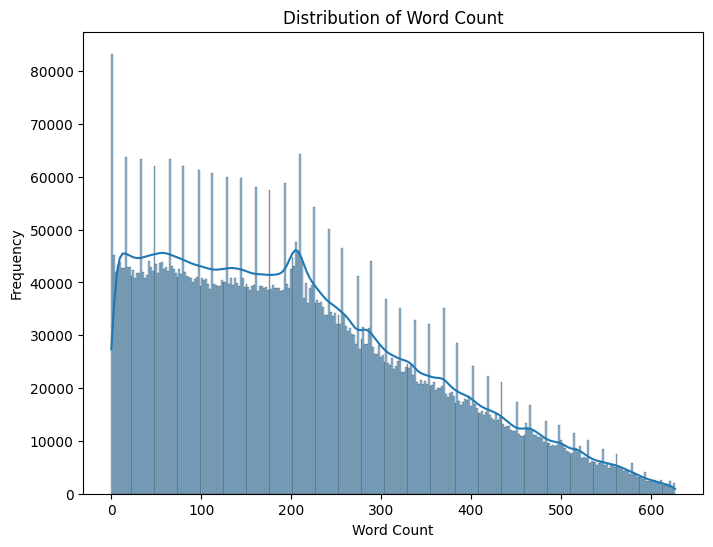

In [30]:
# Distribution of word_count
plt.figure(figsize=(8, 6))
sns.histplot(train_logs['word_count'], kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count")
plt.show()

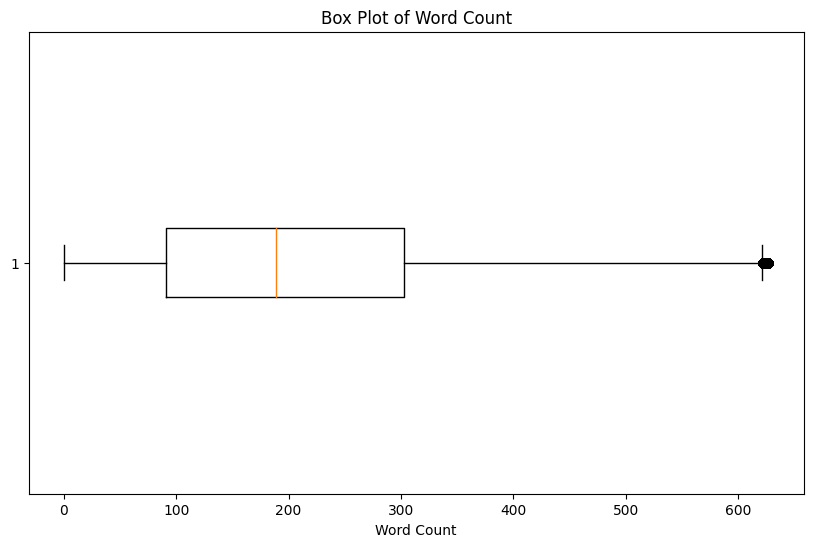

In [31]:
# Box Plot of Word Count
plt.figure(figsize=(10, 6))
plt.boxplot(train_logs['word_count'], vert=False)
plt.title('Box Plot of Word Count')
plt.xlabel('Word Count')
plt.show()

###### activity

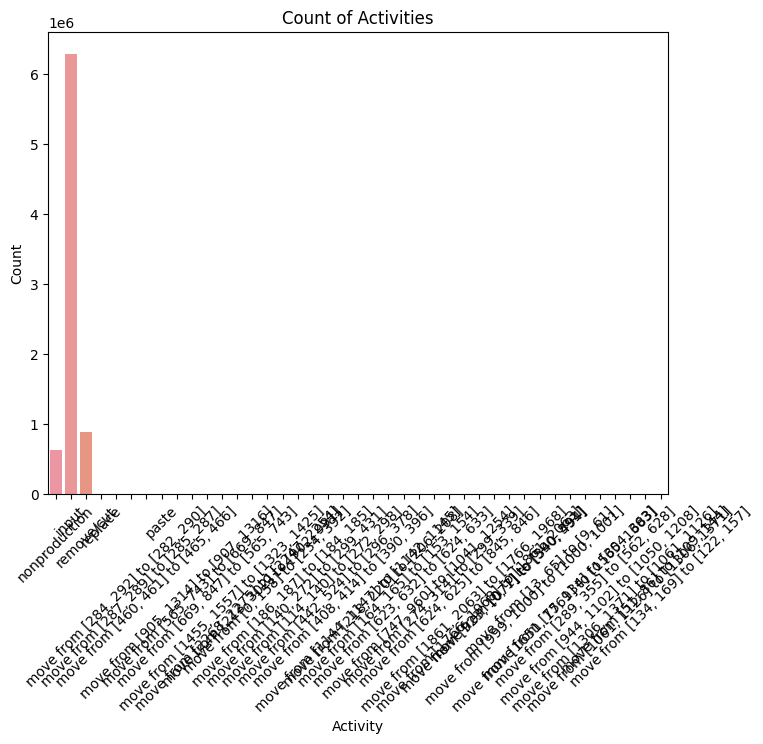

In [32]:
# Countplot of activity categories
plt.figure(figsize=(8, 6))
sns.countplot(data=train_logs, x='activity')
plt.xticks(rotation=45)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Count of Activities")
plt.show()

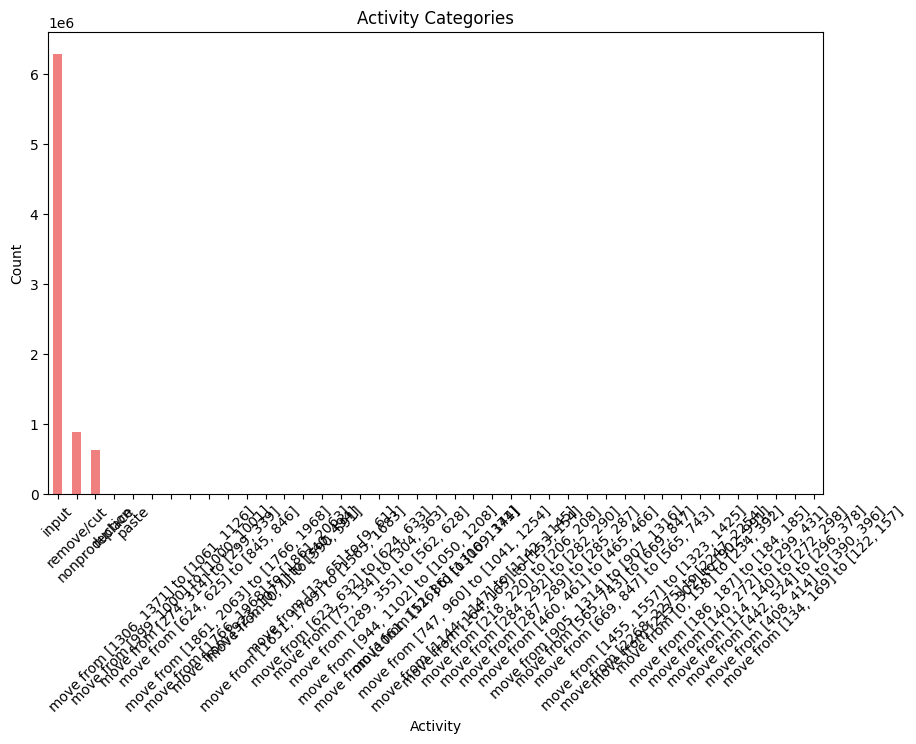

In [33]:
# Bar Chart of Activity Categories
activity_counts = train_logs['activity'].value_counts()
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='lightcoral')
plt.title('Activity Categories')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###### writing quality

###### action time

Text(0.5, 1.0, 'Distribution of Action Time')

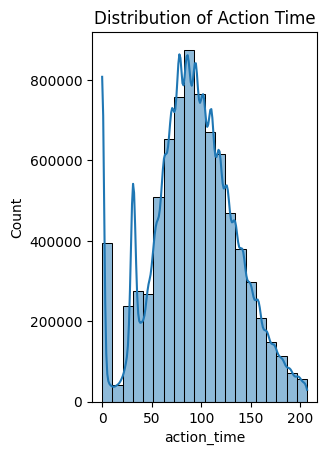

In [34]:
# Action Time Distribution
plt.subplot(1, 2, 2)
sns.histplot(train_logs['action_time'], bins=20, kde=True)
plt.title("Distribution of Action Time")

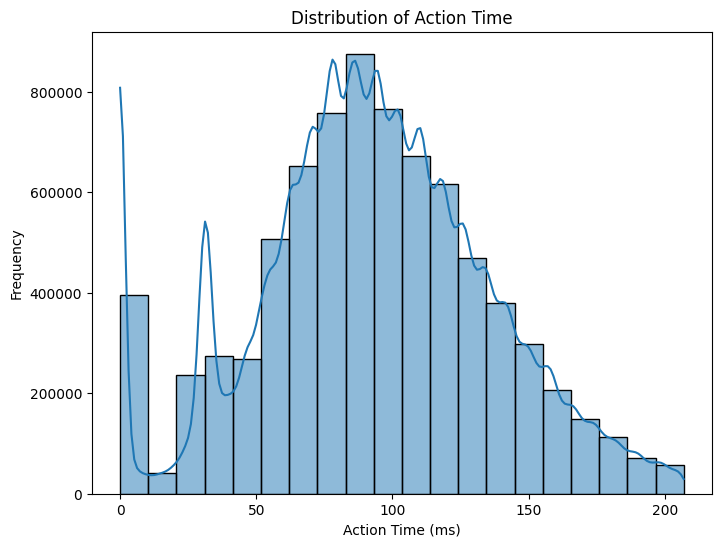

In [35]:
# Action Time Distribution 2
plt.figure(figsize=(8, 6))
sns.histplot(train_logs['action_time'], bins=20, kde=True)
plt.title("Distribution of Action Time")
plt.xlabel("Action Time (ms)")
plt.ylabel("Frequency")
plt.show()

##### Bivariate Analysis

In [36]:
# Don't run

# Pairwise scatterplot to visualize relationships between numeric variables
#sns.pairplot(train_logs, vars=['action_time', 'word_count'])
#plt.title("Pairwise Scatterplot")
#plt.show()

In [37]:
# Don't run

# Pairplot for exploring relationships between numeric features
#sns.pairplot(train_logs[['action_time', 'word_count']])
#plt.show()

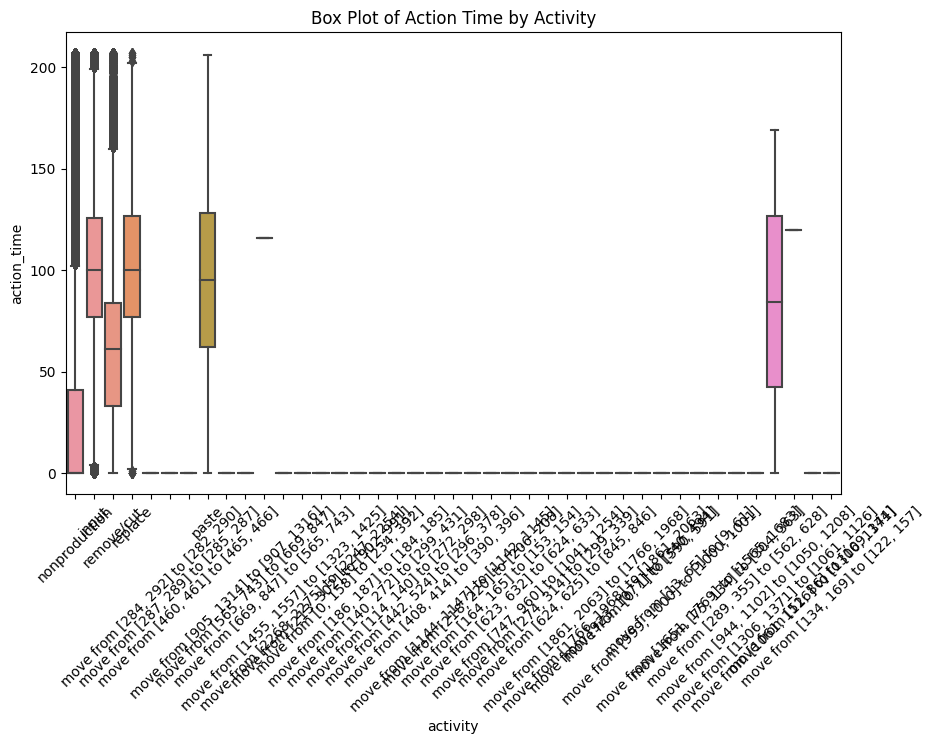

In [38]:
# Box plot of action_time by activity category
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='action_time', data=train_logs)
plt.xticks(rotation=45)
plt.title("Box Plot of Action Time by Activity")
plt.show()

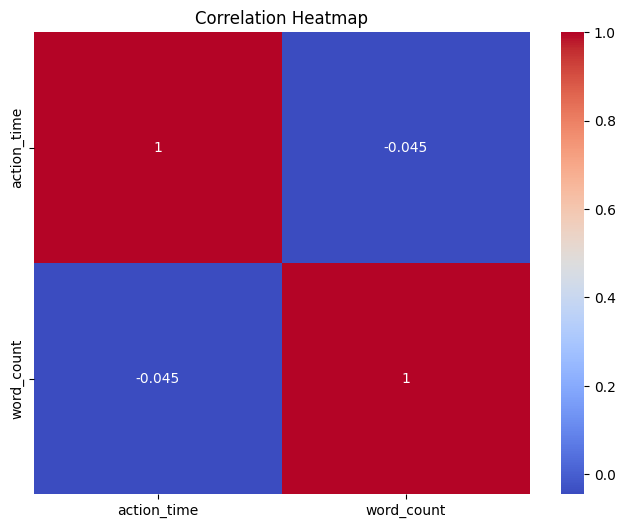

In [39]:
# Heatmap to visualize correlations between some numeric variables
correlation_matrix = train_logs[['action_time', 'word_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

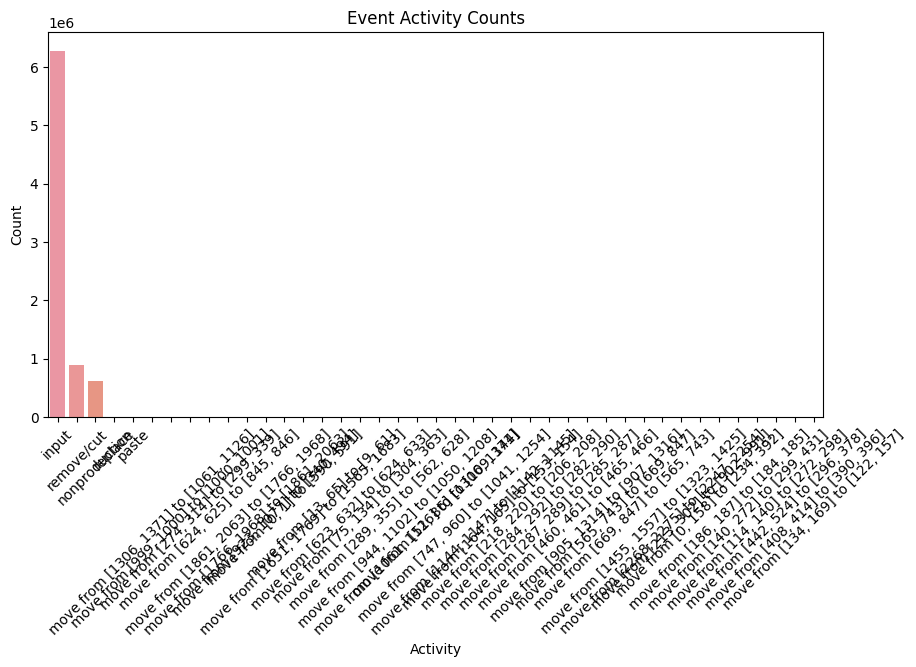

In [40]:
# Event Activity Counts
event_counts = train_logs['activity'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Event Activity Counts')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###### Text analysis

In [41]:
from wordcloud import WordCloud

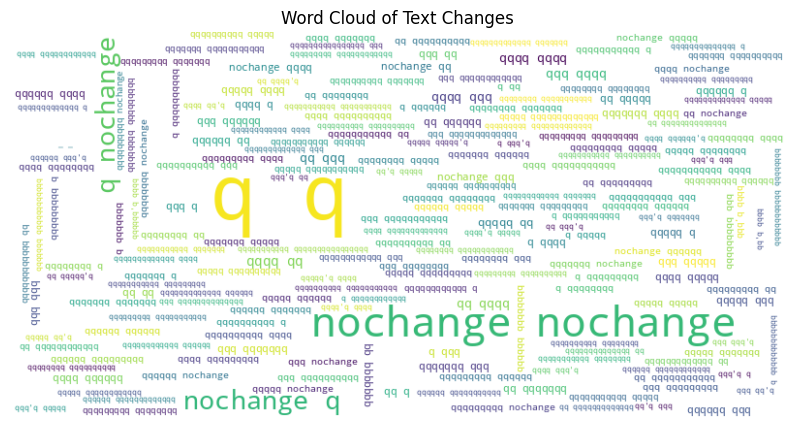

In [42]:
# Text Analysis: Create a Word Cloud
text_data = " ".join(train_logs['text_change'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Changes")
plt.show()